[Documentation of LBMPy](https://mybinder.org/v2/gh/mabau/lbmpy/master?filepath=doc%2Fnotebooks)

[Enhanced MRT](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.102.023307)

[MRT Theory](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.61.6546)

In [1]:
from lbmpy.session import *
from lbmpy.chapman_enskog import ChapmanEnskogAnalysis

In [2]:
lb_config = LBMConfig(method=Method.MRT, stencil=Stencil.D3Q19, compressible=False, zero_centered=False)

In [6]:
# LBStencil(Stencil.D3Q19).plot(data=list(range(19)))

In [7]:
# Create Stencil
stencil = LBStencil(Stencil.D3Q19)

allMoments = lbmpy.moments.get_default_moment_set_for_stencil(stencil)
allMoments

In [10]:
method = create_lb_method(LBMConfig(stencil=Stencil.D2Q9, method=Method.MRT, continuous_equilibrium=False, zero_centered=False))
method.moment_matrix

⎡1   1   1   1   1   1   1  1   1 ⎤
⎢                                 ⎥
⎢0   0   0   -1  1   -1  1  -1  1 ⎥
⎢                                 ⎥
⎢0   1   -1  0   0   1   1  -1  -1⎥
⎢                                 ⎥
⎢0   -1  -1  1   1   0   0  0   0 ⎥
⎢                                 ⎥
⎢0   0   0   0   0   -1  1  1   -1⎥
⎢                                 ⎥
⎢-2  1   1   1   1   4   4  4   4 ⎥
⎢                                 ⎥
⎢0   -1  1   0   0   2   2  -2  -2⎥
⎢                                 ⎥
⎢0   0   0   1   -1  -2  2  -2  2 ⎥
⎢                                 ⎥
⎣1   -2  -2  -2  -2  4   4  4   4 ⎦

In [11]:
rr = [sp.Symbol('omega_shear'), sp.Symbol('omega_bulk'), sp.Symbol('omega_3'), sp.Symbol('omega_4')]

lbm_config = LBMConfig(stencil=Stencil.D2Q9, method=Method.MRT, weighted=True, relaxation_rates=rr, zero_centered=False)
# lbm_config = LBMConfig(stencil=Stencil.D2Q9, method=Method.MRT, weighted=True, zero_centered=False)
weighted_ortho_mrt = create_lb_method(lbm_config=lbm_config)
weighted_ortho_mrt

In [12]:
from lbmpy.methods import mrt_orthogonal_modes_literature
from lbmpy.stencils import get_stencil
from lbmpy.moments import MOMENT_SYMBOLS

x, y, z = MOMENT_SYMBOLS

moments = mrt_orthogonal_modes_literature(LBStencil(Stencil.D2Q9), is_weighted=True)
moments

In [13]:
method = create_lb_method(LBMConfig(stencil=Stencil.D2Q9, method=Method.MRT, nested_moments=moments,
                           relaxation_rates=rr, continuous_equilibrium=False, zero_centered=False))
method

In [14]:
moments = mrt_orthogonal_modes_literature(LBStencil(Stencil.D3Q19), is_weighted=True)
moments

In [17]:
type(moments[0][0])

sympy.core.numbers.One

In [21]:
# sp.core.sympify.sympify(1)
# a = sp.core.sympify(1)

sympy.core.numbers.One

In [22]:
x, y, z = MOMENT_SYMBOLS

moments = [[sp.core.sympify(1), x, y, z], [x**2 + y**2 + z**2 - 3, 9*x**2 - x**2 - y**2 - z**2, y**2 - z**2, x*y, y*z, z*x],
          [(3*x**2 - 5)*x + (3*y**2 - 5)*x + (3*z**2 - 5)*x, (3*x**2 - 5)*y + (3*y**2 - 5)*y + (3*z**2 - 5)*y, 
          (3*x**2 - 5)*z + (3*y**2 - 5)*z + (3*z**2 - 5)*z, (y**2 - z**2)*x, (z**2 - x**2)*y, (x**2 - y**2)*z],
           [3*x**4 - 6*x**2 + 1 + 3*y**4 - 6*y**2 + 1 + 3*z**4 - 6*z**2 + 1, 
            (2*x**2 - 3)*(3*x**2 - x) + (2*y**2 - 3)*(3*x**2 - y) + (2*z**2 - 3)*(3*x**2 - z), 
            (2*x**2 - 3)*(y**2 - z**2) + (2*y**2 - 3)*(y**2 - z**2) + (2*z**2 - 3)*(y**2 - z**2)]]
moments

In [23]:
method = create_lb_method(LBMConfig(stencil=Stencil.D3Q19, method=Method.MRT, nested_moments=moments, continuous_equilibrium=False, zero_centered=False, weighted = True))
method

In [27]:
from lbmpy.moments import moment_matrix, moments_up_to_component_order, exponents_to_polynomial_representations
moment_exponents = list(moments_up_to_component_order(2, 2))
moment_exponents

In [28]:
moments = exponents_to_polynomial_representations(moment_exponents)
moments

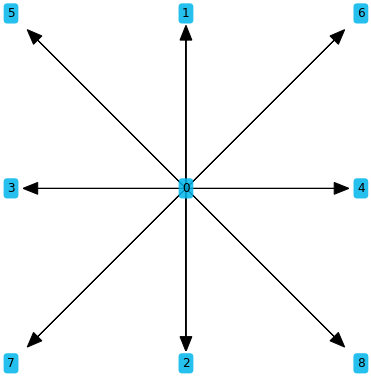

In [29]:
d2q9 = LBStencil(Stencil.D2Q9, ordering='walberla')
d2q9.plot()

In [30]:
M = moment_matrix(moments, stencil=d2q9)
M

⎡1  1  1   1   1  1   1  1   1 ⎤
⎢                              ⎥
⎢0  1  -1  0   0  1   1  -1  -1⎥
⎢                              ⎥
⎢0  1  1   0   0  1   1  1   1 ⎥
⎢                              ⎥
⎢0  0  0   -1  1  -1  1  -1  1 ⎥
⎢                              ⎥
⎢0  0  0   0   0  -1  1  1   -1⎥
⎢                              ⎥
⎢0  0  0   0   0  -1  1  -1  1 ⎥
⎢                              ⎥
⎢0  0  0   1   1  1   1  1   1 ⎥
⎢                              ⎥
⎢0  0  0   0   0  1   1  -1  -1⎥
⎢                              ⎥
⎣0  0  0   0   0  1   1  1   1 ⎦

In [80]:
from lbmpy.equilibrium import ContinuousHydrodynamicMaxwellian
from lbmpy.methods import DensityVelocityComputation

equilibrium = ContinuousHydrodynamicMaxwellian(dim=2, compressible=True, order=2)
cqc = DensityVelocityComputation(d2q9, True, False)

# tuple(zip(moments, equilibrium.moments(moments)))

In [103]:
from lbmpy.methods.creationfunctions import create_from_equilibrium

omega = sp.symbols("omega")
relaxation_rate_dict = {moment : omega for moment in moments}

force_model = forcemodels.Guo(sp.symbols("F_:2"))
method = create_from_equilibrium(d2q9, equilibrium, cqc, relaxation_rate_dict)
method

In [108]:
# method.equilibrium_distribution

ContinuousHydrodynamicMaxwellian(2D, compressible=True, deviation_only:Falseorder=2)

In [247]:
import sympy.abc as w

test_stencil = LBStencil(Stencil.D3Q19)

rho = w.rho
u = sp.symbols('u_0, u_1, u_2')
               
phi = w.phi
psi = w.psi

pb, cs = sp.symbols('p_b, c_s')
deviation = True
krr = sp.Symbol(r"k_{\rho\rho}")
kpp = sp.Symbol('k_{\phi\phi}')
kss = sp.Symbol('k_{\psi\psi}')

x, y, z = sp.symbols('x, y, z')

In [268]:
v = np.array(list(test_stencil))
v_x = v[:, 0]
v_y = v[:, 1]
v_z = v[:, 2]

w_i = np.zeros(19)

w_xx = np.zeros_like(w_i)
w_yy = np.zeros_like(w_i)
w_zz = np.zeros_like(w_i)

w_xy = np.zeros_like(w_i)
w_zx = np.zeros_like(w_i)
w_yz = np.zeros_like(w_i)

w_i[0] = 1/3; w_i[1:7] = 1/18; w_i[7:] = 1/36
w_xx[1:3] = w_yy[3:5] = w_zz[5:7] = 5/36
w_xx[3:7] = w_yy[[1, 2, 5, 6]] = w_zz[1:5] = -1/9
w_xx[7:11] = w_xx[15:] = w_yy[7:15] = w_zz[11:] = -1/72
w_xx[11:15] = w_yy[15:] = w_zz[7:11] = 1/36

w_xy[1:7] = w_yz[1:7] = w_zx[1:7] = 0
w_xy[[7, 10]] = w_yz[[11, 14]] = w_zx[[15, 18]] = 1/12
w_xy[[8, 9]] = w_yz[[12, 13]] = w_zx[[16, 17]] = -1/12
w_xy[11:] = w_yz[7:11] = w_yz[15:] = w_zx[7:15] = 0

w_xx[0] = w_yy[0] = w_zz[0] = 1/6

# w_xx, w_yy, w_zz, w_xy, w_zx, w_yz
a = np.sum(w_i)
b = np.sum(w_xx)
c = np.sum(w_yy)
d = np.sum(w_zz)
e = np.sum(w_xy)
f = np.sum(w_zx)
g = np.sum(w_yz)

# a, b, c, d, e, f, g
w = np.array([w_xx, w_yy, w_zz, w_xy, w_yz, w_zx])
w = w.T

w = np.round(w, 3)
v = np.round(v, 3)

In [269]:
# # w_i = []

# w = sp.Symbol('w')

# w_i = np.zeros(19, dtype = object)
# w = np.zeros((19, 6), dtype = object)

# thing = ['w_{xx}', 'w_{yy}', 'w_{zz}', 'w_{xy}', 'w_{yz}', 'w_{zx}']

# for i in range(19):
#     # w_i.append(sp.Symbol('w_'+str(i)))
#     w_i[i] = sp.Symbol('w_'+str(i))
#     for j in range(6):
#         w[i, j] = sp.Symbol(thing[j] + '^' + str(i))

# # w[0, 0]

In [270]:
from sympy.vector import CoordSys3D, Del
C = CoordSys3D('C')
delop = Del()

f_i_eq = []

d_ab = np.identity(3)

order_parameter = [rho, phi, psi]
k_all = [krr, kpp, kss]
diff1 = [[x, x], [y, y], [z, z], [x, y], [y, z], [z, x]]
    
for i in range(19):
    term1 = sp.core.sympify(0)
    term2 = sp.core.sympify(0)
    
    term3 = sp.core.sympify(0)
    term4 = sp.core.sympify(0)
    term5 = sp.core.sympify(0)
    
    for j in range(3):
        term1 += v[i, j]*rho*u[j]/cs**2
        for k in range(3):
            term1 += rho*u[j]*u[k]*(v[i, j]*v[i, k] - cs**2*d_ab[j, k])
        
        
        # print(k_all[j], order_parameter[j])
        # test = order_parameter[j]*C.x*C.y*C.z
        # gradient_term = delop.gradient(delop.gradient(test))
        # print(gradient_term)
        # term2 += k_all[j]*order_parameter[j]*gradient_term
        
    term1 += pb/cs**2
    term1 *= w_i[i]
    
    term2 *= -w_i[i]/cs**2
    
    for k in range(6):
        term3 += w[i, k]*sp.Derivative(rho, diff1[k][0])*sp.Derivative(rho, diff1[k][1])
    term3 *= krr/cs**2
    
    for k in range(6):
        term4 += w[i, k]*sp.Derivative(phi, diff1[k][0])*sp.Derivative(phi, diff1[k][1])
    term4 *= kpp/cs**2
    
    for k in range(6):
        term5 += w[i, k]*sp.Derivative(psi, diff1[k][0])*sp.Derivative(psi, diff1[k][1])
    term5 *= kss/cs**2
    
    f_i_eq.append(term1 + term2 + term3 + term4 + term5)

In [271]:
equilibrium = lbmpy.equilibrium.GenericDiscreteEquilibrium(test_stencil, f_i_eq, rho, u)

In [272]:
x, y, z = MOMENT_SYMBOLS

zeroth_order = [sp.core.sympify(1)]

first_order = [x, y, z]

second_order = [x**2 + y**2 + z**2 - 1, 3*x**2 - x**2 - y**2 - z**2, y**2 - z**2, x*y, y*z, z*x]
third_order = [(3*x**2 + 3*y**2 + 3*z**2 - 5)*x, (3*x**2 + 3*y**2 + 3*z**2 - 5)*y, 
          (3*x**2 + 3*y**2 + 3*z**2 - 5)*z, (y**2 - z**2)*x, (z**2 - x**2)*y, (x**2 - y**2)*z]

fourth_order = [3*x**4 + 3*y**4 + 3*z**4 - 6*x**2 - 6*y**2 - 6*z**2  + 1, 
            (2*x**2 + 2*y**2 + 2*z**2 - 3)*(3*x**2 - x**2 - y**2 - z**2), 
            (2*x**2 + 2*y**2 + 2*z**2 - 3)*(y**2 - z**2)]

moments = [zeroth_order, first_order, second_order, third_order, fourth_order]

# moments = [[sp.core.sympify(1), x, y, z], [x**2 + y**2 + z**2 - 3, 9*x**2 - x**2 - y**2 - z**2, y**2 - z**2, x*y, y*z, z*x],
#           [(3*x**2 - 5)*x + (3*y**2 - 5)*x + (3*z**2 - 5)*x, (3*x**2 - 5)*y + (3*y**2 - 5)*y + (3*z**2 - 5)*y, 
#           (3*x**2 - 5)*z + (3*y**2 - 5)*z + (3*z**2 - 5)*z, (y**2 - z**2)*x, (z**2 - x**2)*y, (x**2 - y**2)*z],
#            [3*x**4 - 6*x**2 + 1 + 3*y**4 - 6*y**2 + 1 + 3*z**4 - 6*z**2 + 1, 
#             (2*x**2 - 3)*(3*x**2 - x) + (2*y**2 - 3)*(3*x**2 - y) + (2*z**2 - 3)*(3*x**2 - z), 
#             (2*x**2 - 3)*(y**2 - z**2) + (2*y**2 - 3)*(y**2 - z**2) + (2*z**2 - 3)*(y**2 - z**2)]]
moments

In [273]:
moments_unpacked = [*zeroth_order, *first_order, *second_order, *third_order, *fourth_order]

In [274]:
omega = sp.symbols("omega")
relaxation_rate_dict = {moment : omega for moment in moments_unpacked}

cqc = DensityVelocityComputation(test_stencil, True, False)

method = create_from_equilibrium(test_stencil, equilibrium, cqc, relaxation_rate_dict)
method